In [1]:
from wilcoxon import sheets
from wilcoxon.utils import *
import pandas as pd
import seaborn as sns
import geopandas as gpd
import contextily as ctx

In [2]:
halal = sheets.getGeo("Halal")
malls = sheets.getGeo("Malls")

In [3]:
L = []
for mall in malls[["Latitude","Longitude"]].values.tolist():
    total = 0
    for h in halal[["Latitude","Longitude"]].values.tolist():
        if dist(*(tuple(h)+tuple(mall))) < 0.00001:
            total += 1
    L.append(total)
        

In [4]:
L

[48,
 26,
 27,
 0,
 26,
 42,
 16,
 6,
 7,
 26,
 8,
 7,
 10,
 14,
 11,
 4,
 19,
 8,
 5,
 11,
 58,
 14,
 8,
 4,
 17,
 0,
 24,
 33,
 2,
 9,
 26,
 22,
 13,
 7,
 13,
 8,
 22,
 19,
 26,
 7,
 3,
 1,
 28,
 8,
 1,
 14,
 3,
 6,
 26,
 34,
 4,
 7,
 4,
 5,
 13,
 0,
 25,
 17,
 17,
 19,
 18,
 1,
 24,
 18,
 9,
 7,
 2,
 26,
 23,
 16,
 23,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 5,
 18,
 15,
 0,
 18,
 13,
 13,
 14,
 5,
 10,
 11,
 9,
 9,
 0,
 0,
 2,
 9,
 0,
 8,
 3,
 9,
 6,
 8,
 0,
 6,
 3,
 7,
 5,
 0,
 5,
 5,
 4,
 0,
 2,
 1,
 1,
 3,
 2,
 1,
 0,
 0,
 0]

In [117]:
pd.DataFrame(L).to_clipboard(index=False,header=False)

In [108]:
halalG = halal.groupby(["Latitude","Longitude"]).Name.count().reset_index()
halalG = gpd.GeoDataFrame(halalG,geometry=gpd.points_from_xy(halalG.Longitude,halalG.Latitude))

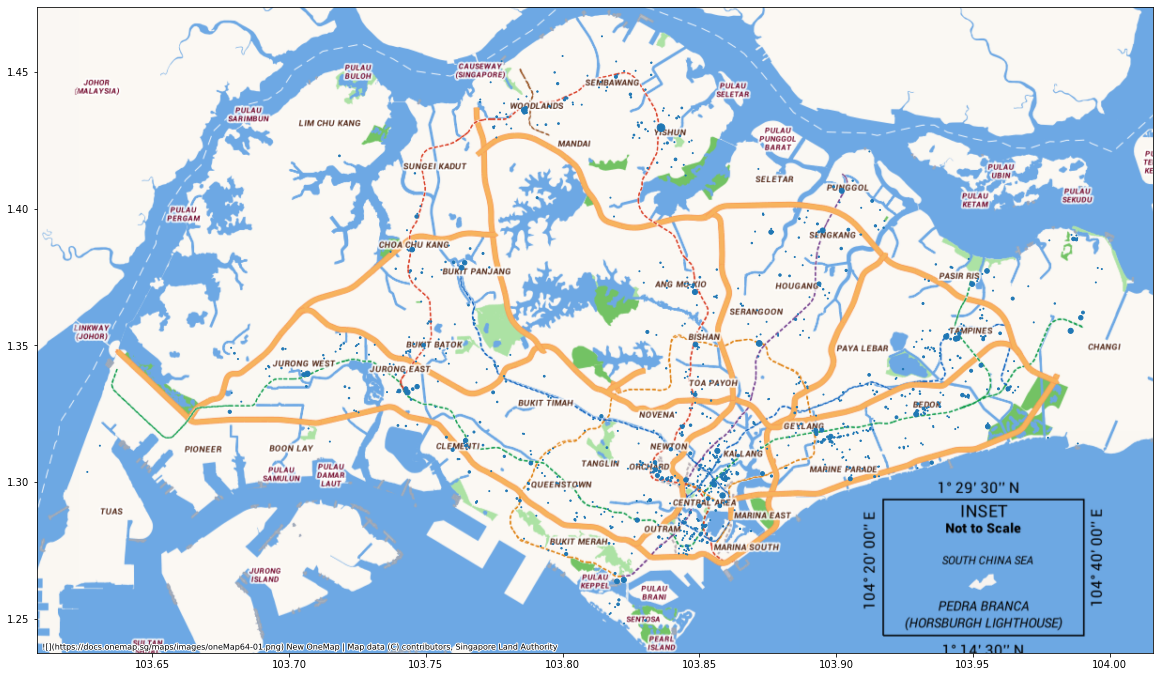

In [111]:
ax = halalG.plot(figsize=(20,20),markersize="Name")
ctx.add_basemap(ax,crs="EPSG:4326",source=ctx.providers.OneMapSG.Default,zoom=12)